# Probability Distributions

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

np.random.seed(234)

iterations = 10_000

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

In [126]:
mu = 2 # mean

# the poisson distribution takes a mean
poisson_dist = stats.poisson(mu=mu)

# use the Random Variates function of my poisson distribution
x_sampled = poisson_dist.rvs(size= iterations) # (rvs) generates random numbers from a probability distribution
x_sampled


array([0, 3, 4, ..., 3, 4, 1])

Text(0, 0.5, 'Frequency')

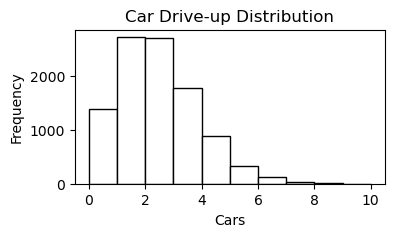

In [127]:
plt.figure(figsize=(4,2))

# plot the poisson distribution
plt.hist(x_sampled, color="w",edgecolor="black")

plt.title("Car Drive-up Distribution")
plt.xlabel("Cars")
plt.ylabel("Frequency")

- What is the probability that no cars drive up in the noon hour?

In [128]:
# convert a scipy type object to np.array
# containing probability mass function computation
x = poisson_dist.pmf(0) # (pmf) gives us the probability of any single outcome.
x

0.1353352832366127

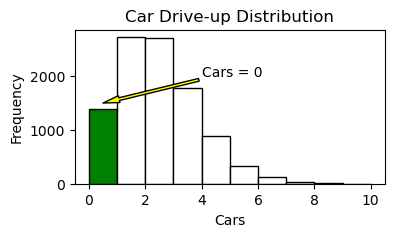

In [129]:
# plot probability mass function of no cars drive up in the noon
plt.figure(figsize=(4,2))

# patches: the individual patches that make up the histogram bars) --> x_sample
# bins_edge: the edges of the bins
# hist_bar: the values of the histogram bins) --> hight of the bar
hist_bar, bins_edge, patches = plt.hist(x_sampled, edgecolor="black")

# Add color to specific bar in the histagram
for i, patch in enumerate(patches):
    if bins_edge[i] == 0:
        patch.set_facecolor('g')
    else:
        patch.set_facecolor("w")

plt.title("Car Drive-up Distribution")
plt.xlabel("Cars")
plt.ylabel("Frequency")

# add notes in visual
plt.annotate("Cars = 0",
             xy=(0.5,1500),xytext=(4,2000), # arrow point and text locations
            arrowprops= dict(facecolor="yellow", # show arrow with color
                             width=2, headwidth=5)) # set size of arra

plt.show()

- What is the probability that 3 or more cars come through the drive through?

In [131]:
# apply survival function
x = poisson_dist.sf(2) # (sf) tells us what the probability of our random variable falling above a certain value i
x

0.32332358381693654

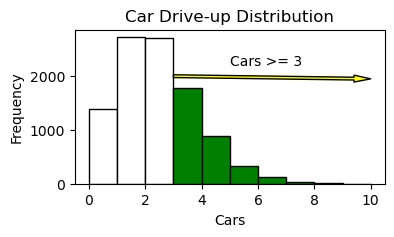

In [132]:
# plot the survival function of 3 or more cars come through the drive through
plt.figure(figsize=(4,2))

hist_bar, bins_edge, patches = plt.hist(x_sampled, ec="black")

for i, patch in enumerate(patches):
    if bins_edge[i] >= 3:
        patch.set_facecolor("g")
    else:
        patch.set_facecolor("w")
        
plt.title("Car Drive-up Distribution")
plt.xlabel("Cars")
plt.ylabel("Frequency")

# add notes in visual
plt.annotate("",
             xy=(10,1950),xytext=(3,2000), # arrow point and text locations
            arrowprops= dict(facecolor="yellow", # show arrow with color
                             width=2, headwidth=5)) # set size of arra

# get arrow and text separate
plt.annotate("Cars >= 3",
            xy= (5,2200))

plt.show()
        

- How likely is it that the drive through gets at least 1 car?

In [134]:
# apply comulative distribution function
x = poisson_dist.sf(1) # (cdf) tells us the likelihood of a single outcome or all the results below it.
x

0.5939941502901616

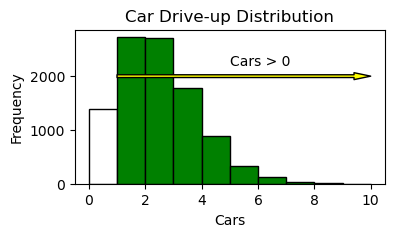

In [135]:
# plot the comulative distribution function of getting atleast on car
plt.figure(figsize=(4,2))

hist_bar, bins_edge, patches = plt.hist(x_sampled, edgecolor="black")

for i,patch in enumerate(patches):
    if bins_edge[i] >= 1:
        patch.set_facecolor("g")
    else:
        patch.set_facecolor("w")
        
plt.title("Car Drive-up Distribution")
plt.xlabel("Cars")
plt.ylabel("Frequency")
        
plt.annotate("",
            xy=(10, 2000), xytext=(1,2000),
            arrowprops= dict(facecolor= "yellow", width=2, headwidth=5))

# get arrow and text separate
plt.annotate("Cars > 0",
            xy= (5,2200))
        
plt.show()

2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?

In [136]:
mu = 3
std = 0.3
req_gpa_prob = 0.95 # top 5%

# The normal distribution takes a mean and a standard deviation
norm_distribution= stats.norm(mu,std)

# use the Random Variates function of my normal distribution
x_sampled = norm_distribution.rvs(size=iterations)

In [137]:
# final the min GPA to be in the top 5%
gpa = norm_distribution.ppf(req_gpa_prob)
gpa

3.4934560880854417

(array([  28.,  208.,  762., 1873., 2740., 2491., 1348.,  446.,   93.,
          11.]),
 array([1.9779995 , 2.19171483, 2.40543017, 2.6191455 , 2.83286083,
        3.04657616, 3.2602915 , 3.47400683, 3.68772216, 3.90143749,
        4.11515282]),
 <BarContainer object of 10 artists>)

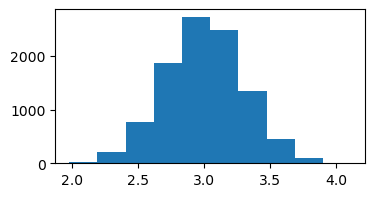

In [138]:
plt.figure(figsize=(4,2))
plt.hist(x_sampled)
# hist_bar, bins_edge,patches = plt.hist(x_sampled, edgecolor="black")

# for i,patch in enumerate(patches):
#     if bins_edge[i] >= gpa:
#         patch.set_facecolor("yellow")

# plt.title("Graduates Grades Distribution")
# plt.xlabel("GPA")
# plt.ylabel("Frequency")

# plt.annotate("",
#             xy=(4, 500), xytext=(gpa,500),
#             arrowprops= dict(facecolor= "yellow", width=2, headwidth=5))

# # get arrow and text separate
# plt.annotate("GPA >= 3.5",
#             xy= (3.5,700))
        
# # make a vertical line
# plt.annotate("",
#             xy=(gpa, 3000), xytext=(gpa,0),
#             arrowprops= dict(facecolor= "red", width=0, headwidth=0))

# plt.show()

- What GPA constitutes the bottom 15% of the class?

In [139]:
req_gpa_prob = 0.15

# final the min GPA to be in the bottom 15%
gpa = norm_distribution.ppf(req_gpa_prob)
gpa

2.689069983151863

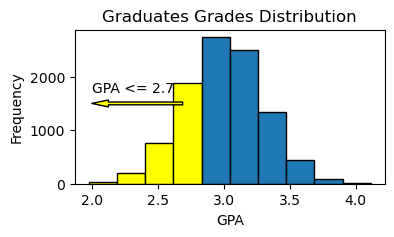

In [140]:
plt.figure(figsize=(4,2))
hist_bar, bins_edge,patches = plt.hist(x_sampled, edgecolor="black")

for i,patch in enumerate(patches):
    if bins_edge[i] <= gpa:
        patch.set_facecolor("yellow")

plt.title("Graduates Grades Distribution")
plt.xlabel("GPA")
plt.ylabel("Frequency")

plt.annotate("",
            xy=(2, 1500), xytext=(gpa,1500),
            arrowprops= dict(facecolor= "yellow", width=2, headwidth=5))

# get arrow and text separate
plt.annotate("GPA <= 2.7",
            xy= (2,1700))

# make a vertical line
plt.annotate("",
            xy=(gpa, 3000), xytext=(gpa,0),
            arrowprops= dict(facecolor= "red", width=0, headwidth=0))

plt.show()

- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [155]:
# students in the third decile --> 305H percentile
sec_decile = 0.2
third_decile = 0.3

# Find gpa tha classify the third decile
# impliment the inverse survival function
norm_distribution.ppf([sec_decile,third_decile])

array([2.74751363, 2.84267985])

In [156]:
st_gpa = norm_distribution.cdf(3.5)

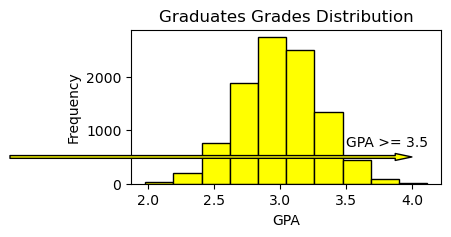

In [157]:
plt.figure(figsize=(4,2))
hist_bar, bins_edge,patches = plt.hist(x_sampled, edgecolor="black")

for i,patch in enumerate(patches):
    if bins_edge[i] >= st_gpa:
        patch.set_facecolor("yellow")

plt.title("Graduates Grades Distribution")
plt.xlabel("GPA")
plt.ylabel("Frequency")

plt.annotate("",
            xy=(4, 500), xytext=(st_gpa,500),
            arrowprops= dict(facecolor= "yellow", width=2, headwidth=5))

# get arrow and text separate
plt.annotate("GPA >= 3.5",
            xy= (3.5,700))
        
# # make a vertical line
# plt.annotate("",
#             xy=(gpa, 3000), xytext=(gpa,0),
#             arrowprops= dict(facecolor= "red", width=0, headwidth=0))

plt.show()

- If I have a GPA of 3.5, what percentile am I in?

In [158]:
st_gpa = 3.5 # top 5%

# final the min GPA to be in the top 5%
gpa = norm_distribution.cdf(st_gpa) # (pdf) for continuous distributions
gpa

0.9522096477271853

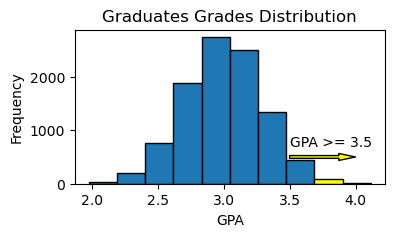

In [159]:
plt.figure(figsize=(4,2))
hist_bar, bins_edge,patches = plt.hist(x_sampled, edgecolor="black")

for i,patch in enumerate(patches):
    if bins_edge[i] >= st_gpa:
        patch.set_facecolor("yellow")

plt.title("Graduates Grades Distribution")
plt.xlabel("GPA")
plt.ylabel("Frequency")

plt.annotate("",
            xy=(4, 500), xytext=(st_gpa,500),
            arrowprops= dict(facecolor= "yellow", width=2, headwidth=5))

# get arrow and text separate
plt.annotate("GPA >= 3.5",
            xy= (3.5,700))
        
# # make a vertical line
# plt.annotate("",
#             xy=(gpa, 3000), xytext=(gpa,0),
#             arrowprops= dict(facecolor= "red", width=0, headwidth=0))

plt.show()

3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [160]:
mu = 0.02
num_trial = 4326

binom_distribution = stats.binom(num_trial, mu)

x_sampled = binom_distribution.rvs(iterations)

x = binom_distribution.sf(97)
x

0.11781530585978471

4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.
- What is the probability that at least one of your first 60 answers is correct?


In [166]:
array = stats.randint(1,101)

x_sampled = array.rvs(iterations)

array.pmf(1)

0.01

(array([1024., 1006., 1006.,  964.,  973., 1040., 1026.,  968.,  985.,
        1008.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

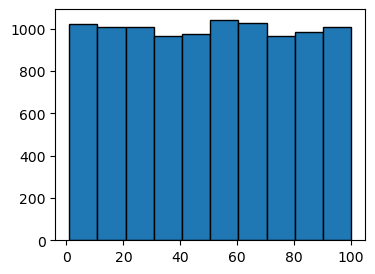

In [167]:
plt.figure(figsize=(4,3))
plt.hist(x_sampled, edgecolor="black")

5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 

- How likely is it that the break area gets cleaned up each day? 

In [168]:
visitors_per_day = 0.9
students_per_coh= 22
cohorts = 3
success_rate = 0.03

# Calculate the number of students visiting the break area each day
visitors = int(students_per_coh * cohorts * visitors_per_day)
binom_distribution = stats.binom(visitors, success_rate)

x_sampled= binom_distribution.rvs(iterations)
clean_erea = binom_distribution.sf(0)
clean_erea

0.8342199288437352

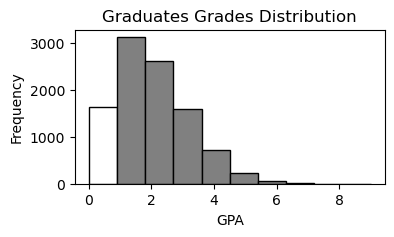

In [169]:
plt.figure(figsize=(4,2))
hist_bar, bins_edge,patches = plt.hist(x_sampled, edgecolor="black")

for i,patch in enumerate(patches):
    if bins_edge[i] > clean_erea:
        patch.set_facecolor("gray")
    else:
        patch.set_facecolor('w')

plt.title("Graduates Grades Distribution")
plt.xlabel("GPA")
plt.ylabel("Frequency")

# plt.annotate("",
#             xy=(4, 500), xytext=(st_gpa,500),
#             arrowprops= dict(facecolor= "yellow", width=2, headwidth=5))

# # get arrow and text separate
# plt.annotate("GPA >= 3.5",
#             xy= (3.5,700))
        
# # make a vertical line
# plt.annotate("",
#             xy=(gpa, 3000), xytext=(gpa,0),
#             arrowprops= dict(facecolor= "red", width=0, headwidth=0))

plt.show()

- How likely is it that it goes two days without getting cleaned up? All week?

In [173]:
visitors_day2 = visitors * 2
binom_distribution = stats.binom(visitors_day2, success_rate)

clean_erea = binom_distribution.pmf(0)
clean_erea

0.027483031992576134

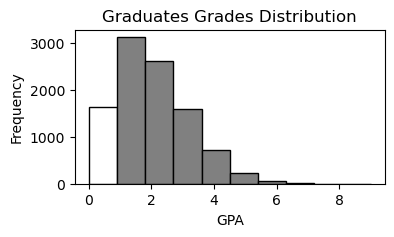

In [174]:
plt.figure(figsize=(4,2))
hist_bar, bins_edge,patches = plt.hist(x_sampled, edgecolor="black")

for i,patch in enumerate(patches):
    if bins_edge[i] > clean_erea:
        patch.set_facecolor("gray")
    else:
        patch.set_facecolor('w')

plt.title("Graduates Grades Distribution")
plt.xlabel("GPA")
plt.ylabel("Frequency")

# plt.annotate("",
#             xy=(4, 500), xytext=(st_gpa,500),
#             arrowprops= dict(facecolor= "yellow", width=2, headwidth=5))

# # get arrow and text separate
# plt.annotate("GPA >= 3.5",
#             xy= (3.5,700))
        
# # make a vertical line
# plt.annotate("",
#             xy=(gpa, 3000), xytext=(gpa,0),
#             arrowprops= dict(facecolor= "red", width=0, headwidth=0))

plt.show()

In [175]:
visitors_day2 = visitors * 7
binom_distribution = stats.binom(visitors_day2, success_rate)
clean_erea = binom_distribution.pmf(0)
clean_erea

3.4413294569879704e-06

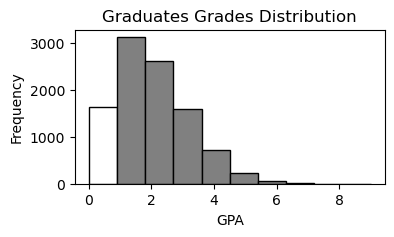

In [176]:
plt.figure(figsize=(4,2))
hist_bar, bins_edge,patches = plt.hist(x_sampled, edgecolor="black")

for i,patch in enumerate(patches):
    if bins_edge[i] > clean_erea:
        patch.set_facecolor("gray")
    else:
        patch.set_facecolor('w')

plt.title("Graduates Grades Distribution")
plt.xlabel("GPA")
plt.ylabel("Frequency")

# plt.annotate("",
#             xy=(4, 500), xytext=(st_gpa,500),
#             arrowprops= dict(facecolor= "yellow", width=2, headwidth=5))

# # get arrow and text separate
# plt.annotate("GPA >= 3.5",
#             xy= (3.5,700))
        
# # make a vertical line
# plt.annotate("",
#             xy=(gpa, 3000), xytext=(gpa,0),
#             arrowprops= dict(facecolor= "red", width=0, headwidth=0))

plt.show()

6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 

- If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [177]:
mu = 15 * 2
std = 3 * 2

# calculate the number og people can afford to wait for
# orders_time_people = 60 // 2
# wait_time_after_order= 10 // 2
# max_pleople = orders_time_people - wait_time_after_order
# print(max_pleople)

max_time = 60 - 15 - 10 - 2
# find liklyhood of 15 min left
norm_distribution = stats.norm(mu,std)
x_sampled = norm_distribution.rvs(iterations)

norm_distribution.cdf(max_time)

0.6914624612740131

(array([  25.,  177.,  796., 2083., 2974., 2492., 1102.,  294.,   52.,
           5.]),
 array([ 8.38002672, 13.02829932, 17.67657192, 22.32484452, 26.97311711,
        31.62138971, 36.26966231, 40.91793491, 45.56620751, 50.2144801 ,
        54.8627527 ]),
 <BarContainer object of 10 artists>)

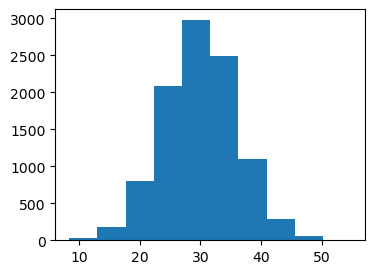

In [178]:
plt.figure(figsize=(4,3))
plt.hist(x_sampled)

7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

- What percent of employees earn less than 60,000?
- What percent of employees earn more than 95,000?
- What percent of employees earn between 65,000 and 80,000?
- What do the top 5% of employees make?

Hint If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your .gitignore, your env.py, and to use pd.read_sql. Copy over your .gitignore and env.py from your data science libraries exercises folder, and connect to the employees database like so:

In [ ]:
query = 
```
SELECT *
FROM salaries as s
WHERE s.todate > now();
```

In [179]:
# after importing all the data run the code bellow

In [ ]:
mu = salaries.salary.mean()
std = slaries.salary.std()
(mu,std)


#1
stats.normal(mu, std).cdf(60000)

#2
stats.normal(mu, std).sf(95000)

#3
stats.normal(mu, std).cdf([650000,80000])

#4
stats.normal(mu, std).isf(0.05)